<a href="https://colab.research.google.com/github/lyngoo/lyn/blob/main/3%EC%9E%A5%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1번


In [62]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
     
d=np.sqrt((10-13)**2+(15-19)**2)

In [63]:
#1-1번 정답
d

5.0

In [64]:
WSS_1=3**2+d**2+4**2
WSS_1

50.0

In [65]:
WSS_2=4**2+4**2
WSS_2

32

In [66]:
TWSS=WSS_2+WSS_1

In [67]:
TWSS

82.0

In [68]:
#1-2번 정답
print(WSS_1)

print(WSS_2)

print(TWSS)

50.0
32
82.0


In [69]:
#1-3번 k값이 4~5지점에서 엘보우 포인트가 나타나므로 군집의 수 는 4개가 적당하다

2번


In [70]:
data = np.array([[1,4],[4,2],[3,7],[6,1],[2,5]])
data

array([[1, 4],
       [4, 2],
       [3, 7],
       [6, 1],
       [2, 5]])

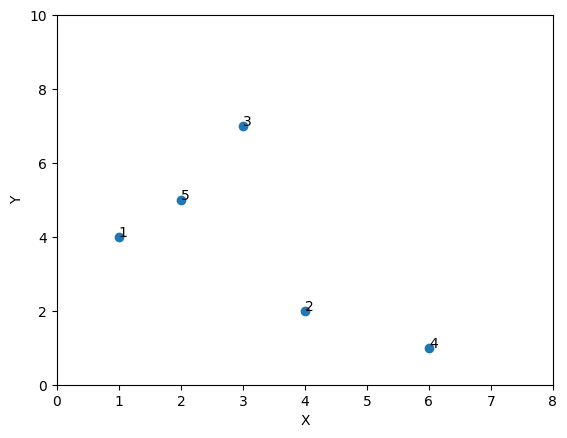

In [71]:
# 원데이터의 X, Y의 산포도  
plt.scatter(data[:,0], data[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 8)
plt.ylim(0, 10)

# 행과 열의 수 
rows, columns = data.shape
# 데이터 라벨 
for i in range(rows):
  plt.annotate(i+1, (data[i,0], data[i,1]))

In [72]:
# 데이터 표준화
scaler = StandardScaler()
scaler.fit(data)  #표준화 스케일러를 data에 기준을 맞춤춤
data_std = scaler.transform(data)
print(data_std)

[[-1.27872403  0.09365858]
 [ 0.46499055 -0.84292723]
 [-0.11624764  1.4985373 ]
 [ 1.62746694 -1.31122014]
 [-0.69748583  0.56195149]]


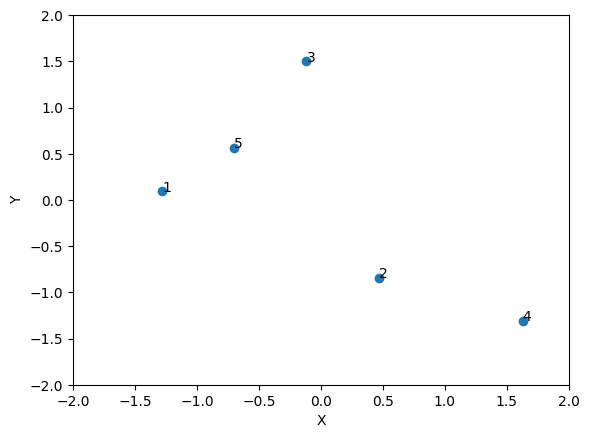

In [73]:
# 표준화 데이터의 X, Y의 산포도  
plt.scatter(data_std[:,0], data_std[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# 행과 열의 수
rows, columns = data_std.shape
# 데이터 라벨 
for i in range(rows):
  plt.annotate(i+1, (data_std[i,0], data_std[i,1]))

In [74]:
# 군집의 수를 2개로 하는 군집화 객체
kmeans = KMeans(n_clusters=2)
# 2, 3열을 이용한 군집화
kmeans.fit(data_std)
# 군집 라벨 
print(kmeans.labels_)
# 군집별 군집 중심
print(kmeans.cluster_centers_)

[0 1 0 1 0]
[[-0.69748583  0.71804912]
 [ 1.04622875 -1.07707368]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


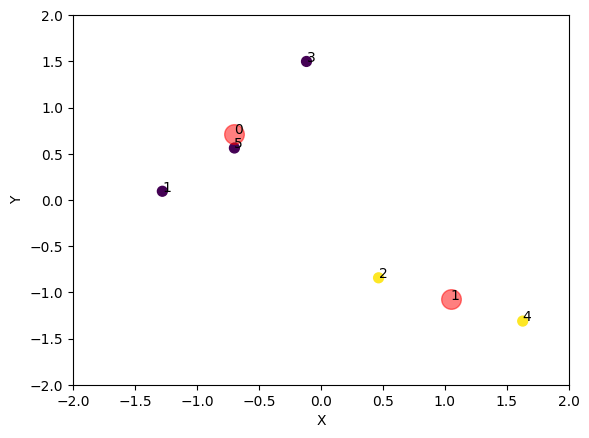

In [75]:
# 결과 분석
# 군집 데이터 분포 
plt.scatter(data_std[:,0], data_std[:,1], c=kmeans.labels_, s=50)
# plt.title('X와 Y에 대한 분포: 표준화')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# 행과 열의 수
rows, columns = data_std.shape

# 데이터 라벨
for i in range(rows):
  plt.annotate(i+1, (data_std[i,0], data_std[i,1]))  

# 군집 중심 표시 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            c='red', s=200, alpha=0.5);
# 군집 라벨 
for k in range(columns):
  plt.annotate(k, 
              (kmeans.cluster_centers_[k, 0], kmeans.cluster_centers_[k, 1]))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

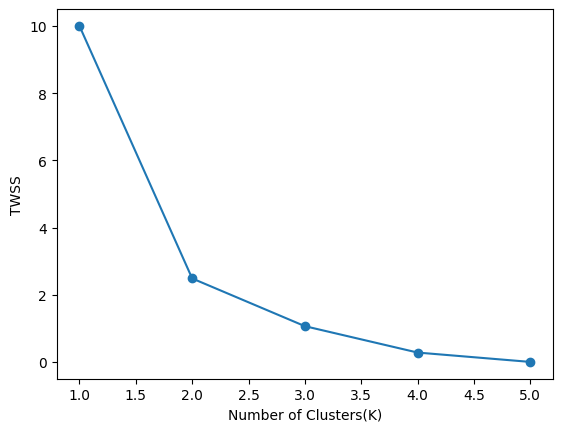

In [76]:
# 클러스터 수별 TWSS 값  
TWSS = {}

# 군집 수 1~5까지 반복 
for k in range(1, 6): 
  # 군집 수 설정과 군집화 객체 생성 
  model = KMeans(n_clusters=k)
  # 표준화된 X, Y 데이터에 대한 군집화  
  model.fit(data_std)
  # 군집 수별 TWSS 값 저장 
  TWSS[k] = model.inertia_
  

# # 군집 수에 따른 TWSS 그래프
plt.plot(list(TWSS.keys()), list(TWSS.values()), marker='o')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("TWSS")
plt.show()

In [77]:
# 군집화 
K=2
kmeans = KMeans(n_clusters=K)
kmeans.fit(data_std)
# 군집 중심 
centers = kmeans.cluster_centers_
# 군집 라벨 
labels = kmeans.labels_
print(centers)
print(labels)

[[ 1.04622875 -1.07707368]
 [-0.69748583  0.71804912]]
[1 0 1 0 1]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2-2번 정답

 군집1의 중심[1.04622875 -1.07707368]
 군집2의 중심[-0.69748583  0.71804912]

In [78]:
print(data_std)


[[-1.27872403  0.09365858]
 [ 0.46499055 -0.84292723]
 [-0.11624764  1.4985373 ]
 [ 1.62746694 -1.31122014]
 [-0.69748583  0.56195149]]


In [79]:
#거리계산
import math
def distance(x1,y1,x2,y2):
  result = math.sqrt(math.pow(x1-x2,2) + math.pow(y1-y2,2))
  return result
#k1의 중심과의 거리
p1=(-0.69748583,  0.71804912)

p2=(-1.27872403 , 0.09365858)
d = distance(p1[0],p1[1],p2[0],p2[1])
print(d)

0.8530541551277572


In [80]:

p2=(0.46499055, -0.84292723)
d = distance(p1[0],p1[1],p2[0],p2[1])
print(d)

1.9462781145862034


In [81]:
p2=(-0.11624764 , 1.4985373)
d = distance(p1[0],p1[1],p2[0],p2[1])
print(d)

0.9731390613032592


In [82]:
p2=(1.62746694 ,-1.31122014)
d = distance(p1[0],p1[1],p2[0],p2[1])
print(d)

3.085990782927198


In [83]:
p2=(-0.69748583 , 0.56195149)
d = distance(p1[0],p1[1],p2[0],p2[1])
print(d)

0.15609763


In [84]:
#k2의 중심과의 거리
p1=(1.04622875, -1.07707368)

p2=(-1.27872403 , 0.09365858)
d = distance(p1[0],p1[1],p2[0],p2[1])
print(d)

2.603078841263637


In [85]:
p2=( 0.46499055, -0.84292723)
d = distance(p1[0],p1[1],p2[0],p2[1])
print(d)

0.6266278043518677


In [86]:
p2=(-0.11624764,  1.4985373)
d = distance(p1[0],p1[1],p2[0],p2[1])
print(d)

2.8257960431715508


In [87]:
p2=( 1.62746694, -1.31122014)
d = distance(p1[0],p1[1],p2[0],p2[1])
print(d)

0.626627798812826


In [88]:
p2=(-0.69748583 , 0.56195149)
d = distance(p1[0],p1[1],p2[0],p2[1])
print(d)

2.3931034337023767


In [89]:
import pandas as pd
col = [0, 0]
ind = [0, 0]
con = [[0, 0], [0, 0]]
df = pd.DataFrame(con, columns=col, index=ind)


In [90]:
def df_maker(col_num, ind_num, fill):
    col = []
    ind = []
    con = []
    for i in range(0,col_num):
        col.append(fill)
    for i in range(0,ind_num):
        ind.append(fill)
    for i in range(0,ind_num):
        con.append(col)
    return pd.DataFrame(con, columns=col, index=ind)


In [91]:
df = df_maker(5,5,0)  # 3X3 데이터 프레임 생성 0으로 채움
col = ["X","Y","거리1","거리2","군집할당",]
ind = [1,2,3,4,5]
df.columns = col  # 컬럼 col 리스트로 덮어씌움
df.index = ind    # 인덱스 ind 리스트로 덮어씌움

In [92]:
print(df)

   X  Y  거리1  거리2  군집할당
1  0  0    0    0     0
2  0  0    0    0     0
3  0  0    0    0     0
4  0  0    0    0     0
5  0  0    0    0     0


In [93]:
df["X"] = [-1.27872403,0.46499055,-0.11624764,1.62746694,-0.69748583]
df["Y"] = [0.09365858,-0.84292723, 1.4985373,-1.31122014,  0.56195149]
df["거리1"] = [0.8530541551277572,
1.9462781145862034,
0.9731390613032592,
3.085990782927198,
0.15609763]
df["거리2"] = [2.603078841263637,
0.6266278043518677,
2.8257960431715508,
0.626627798812826,
2.3931034337023767]
df["군집할당"]=[0, 1 ,0 ,1, 0]

2-1번 정답


In [94]:
print(df)

          X         Y       거리1       거리2  군집할당
1 -1.278724  0.093659  0.853054  2.603079     0
2  0.464991 -0.842927  1.946278  0.626628     1
3 -0.116248  1.498537  0.973139  2.825796     0
4  1.627467 -1.311220  3.085991  0.626628     1
5 -0.697486  0.561951  0.156098  2.393103     0


In [95]:
print(TWSS)

{1: 10.0, 2: 2.484392287023866, 3: 1.0638928402086296, 4: 0.2785680417259364, 5: 0.0}


2-3번정답

In [96]:
WSS_1=0.853054**2+0.973139**2+0.156098**2
WSS_1

1.699067225841

In [97]:
WSS_2=0.626628 **2+0.626628**2
WSS_2

0.7853253007679999

In [98]:
TWSS_k2=WSS_1+WSS_2
TWSS_k2

2.4843925266089997